# Machine Learning - Decision Trees (Árvores de Decisão) - LendingClub

Para este projeto, estaremos utilizando dados disponíveis publicamente de Lending Club. LEnding club conecta pessoas que precisam de dinheiro com pessoas que tem dinheiro (Investidores).
Como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidae de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso. 

#### Aqui está o que as colunas representam:
- credit.policy: 1 Se o cliente atender aos critérios de subscrição de crédito da LendinClub.com, e 0 caso o contrário.
- purpose: O Objetivo do empréstimo (Leva valores "credit_card", "debt_consolidation", "educacional", "major_purchase" , "small_business" e "all_other")
- int.rat: A taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os Mutuários julgados por lendingClub para serem mais arriscados, recebem taxas de juros mais altas.
- installment: As Parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
- log.annual.inc: O log natural da renda anual auto-relatada do Mutuário.
- dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual)
- fico: a pontuação de crédito FICO do Mutuário
- days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito
- revol.bal: Saldo rotativo do Mtuário (Montante não pago no final do ciclo de cobrança do cartão de crédito) 
- revol.util: Taxa de utilização da linha rotativa do Mutuário (O valor da linha de crédito utilizada em relação ao crédito total disponível) 
- inq.last.6mths: Número de consultas do Mutuário por credores nos últimos 6 meses.
- delinq.2yrs: O número de vezes que o Mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
- pub.rec: O número de registros públicos depreciativos do Mutuário (Arquivamento de falências, ônus fiscais ou julgamentos)

#### Importando as libs necesárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Obtendo o arquivo de dados e definindo como Df

In [2]:
df = pd.read_csv('loan_data.csv')

#### Verificando o cabeçalho do nosso Data Frame com o método .head() para ver como estão distribuídos os nossos dados

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Vendo quantas colunas e linhas existem no nosso Data Frame

In [10]:
df.shape

(9578, 14)

#### Verificando as informações do Data Frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Verificando a existência de Valores Nulos

In [9]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Análise Exploratória dos Dados

Text(0.5, 0, 'FICO')

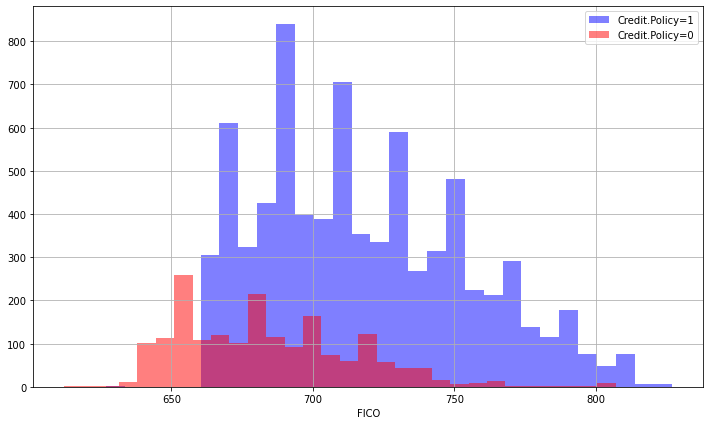

In [21]:
plt.figure(figsize=(12, 7))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit.Policy=1' )
df[df['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy=0' )
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

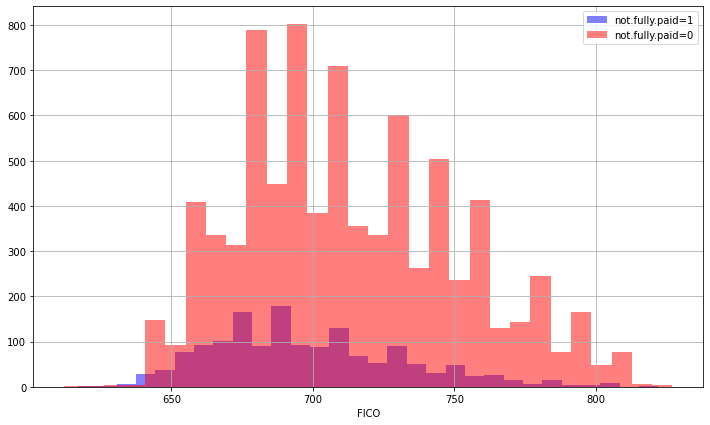

In [22]:
plt.figure(figsize=(12, 7))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1' )
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0' )
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

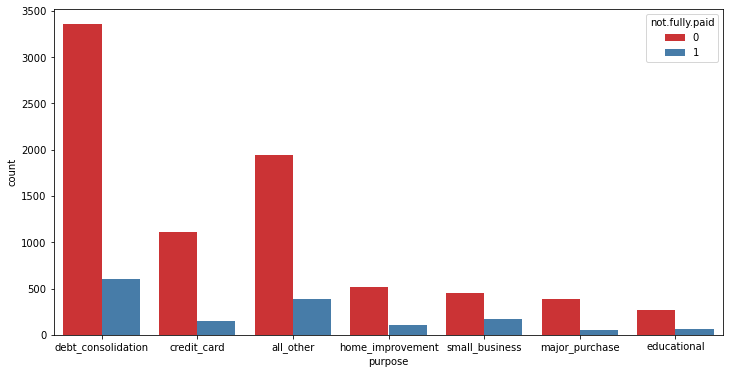

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1' )

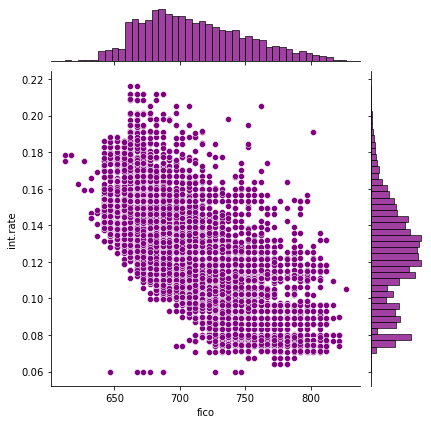

In [28]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple')

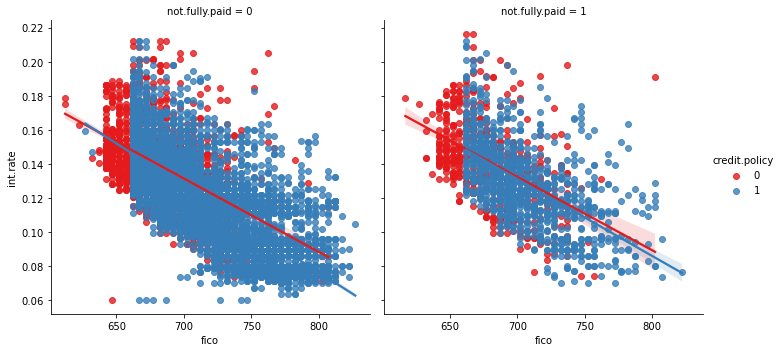

In [29]:
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1')

## Construindo o Modelo

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [31]:
 df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [32]:
cat_feats = ['purpose']

In [34]:
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#### Divisão dos dados Treino-Teste

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#### Treinando o modelo 

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Previsões e avaliação da Árvore de Decisão

In [41]:
prediction = dtree.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.21      0.25      0.23       443

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.74      0.75      2874



In [44]:
print(confusion_matrix(y_test, prediction))

[[2013  418]
 [ 333  110]]
